In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('admitted_patients2024.csv')

# Display the first few rows to understand the structure of the data
df.head()


,CR_No,Patient_Name,Emergency_Visit_date,Admission_Date,Ward_Type,Department_Name,Ward_Name,Treating_Doctor,Discharge_Date,LOS,Discharge_Status,Unnamed: 11
0,939152301659145,Jagseer Kumar,12/31/23 16:16,1/1/24 14:23,General Ward,Orthopaedics,3 D Orthopaedics Ward,Dr Nilesh Barwar,1/13/24 8:49,13.0,Normal Discharge,NaN
1,939152301659285,Balvir Singh,12/31/23 22:59,1/1/24 0:35,General Ward,General Medicine,3 B Medicine2 Ward,Dr Preeti Singh Dhoat,1/2/24 0:28,2.0,Normal Discharge,NaN
2,939152400000015,Sukhpreet Kaur,1/1/24 2:16,1/1/24 16:43,General Ward,Pulmonary Medicine,0 B Critical care Ward,Dr Ramniwas,1/2/24 3:21,2.0,Death,NaN
3,939152400000031,Manjit Kaur,1/1/24 5:43,1/1/24 9:44,General Ward,Cardiology,2 C Cardiology Ward,Dr Bhupinder Singh,1/8/24 16:51,8.0,Normal Discharge,NaN
4,939152100327535,Sukhmander Singh,1/1/24 10:16,1/1/24 14:34,General Ward,Orthopaedics,2 D Ortho and Pmr Ward,Dr Nilesh Barwar,1/4/24 15:30,4.0,Normal Discharge,NaN


In [34]:
# Check the column names to identify relevant columns
print(df.columns)

Index(['CR_No', 'Patient_Name', 'Emergency_Visit_date', 'Admission_Date',
       'Ward_Type', 'Department_Name', 'Ward_Name', 'Treating_Doctor',
       'Discharge_Date', 'LOS', 'Discharge_Status', 'Unnamed: 11'],
      dtype='object')


In [35]:
# Count the total number of unique patients served in the Emergency Department (ED)
# Assuming each row corresponds to a unique patient visit

total_patients = df['Emergency_Visit_date'].notnull().sum()
print("Total number of patients served in the Emergency Department (ED):", total_patients)

Total number of patients served in the Emergency Department (ED): 10921


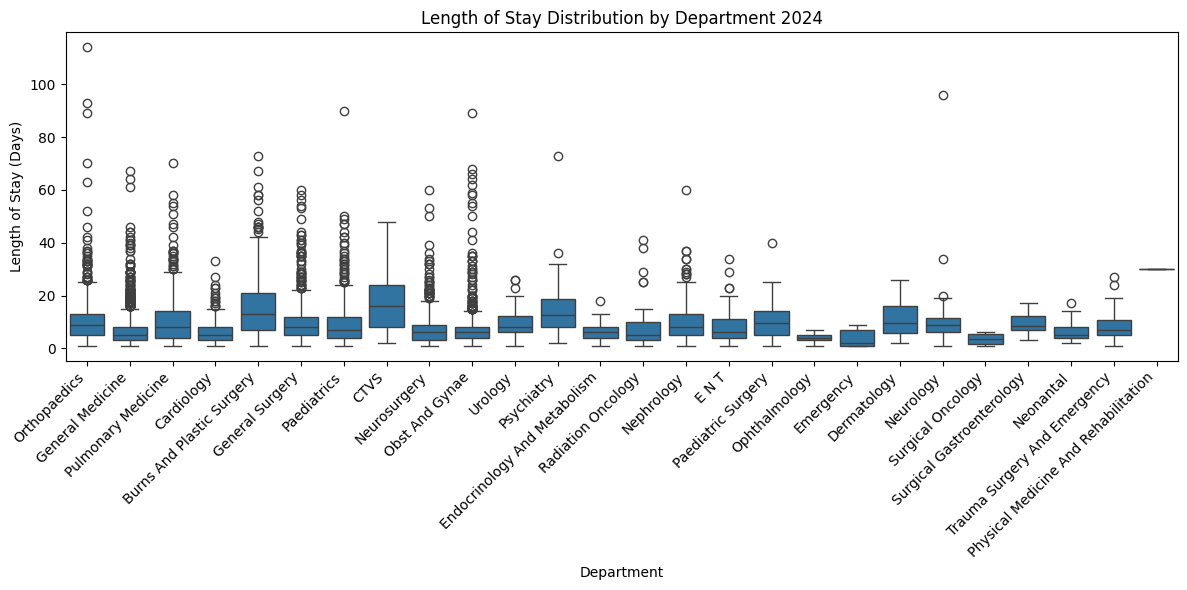

Summary Statistics for Length of Stay by Department:
                                       mean  median  count
Department_Name                                           
Physical Medicine And Rehabilitation  30.00    30.0      1
CTVS                                  17.00    16.0     33
Burns And Plastic Surgery             16.96    13.0    198
Psychiatry                            15.39    12.5     36
Dermatology                           10.83     9.5     12
Orthopaedics                          10.53     9.0    830
Neurology                             10.42     9.0     59
Pulmonary Medicine                    10.41     8.0    737
Nephrology                            10.03     8.0    326
Paediatrics                            9.94     7.0    434
Paediatric Surgery                     9.91     9.5     98
Urology                                9.55     8.0     64
Surgical Gastroenterology              9.50     8.5     10
General Surgery                        9.35     8.0   1085
E N

In [71]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Department_Name', y='LOS')
plt.xticks(rotation=45, ha='right')
plt.title('Length of Stay Distribution by Department 2024')
plt.xlabel('Department')
plt.ylabel('Length of Stay (Days)')
plt.tight_layout()
plt.show()

# Print summary statistics
summary = df.groupby('Department_Name')['LOS'].agg(['mean', 'median', 'count']).round(2)
summary = summary.sort_values('mean', ascending=False)
print("\
Summary Statistics for Length of Stay by Department:")
print(summary)

/var/folders/bh/9hfwcgrx7db17t6812jhpk7m0000gn/T/ipykernel_28352/852345074.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Emergency_Visit_date'] = pd.to_datetime(df['Emergency_Visit_date'])
/var/folders/bh/9hfwcgrx7db17t6812jhpk7m0000gn/T/ipykernel_28352/852345074.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Admission_Date'] = pd.to_datetime(df['Admission_Date'])


Time to Admission Statistics (in hours):
count    10921.00
mean        10.48
std         12.16
min          0.00
25%          2.07
50%          6.02
75%         15.03
max         71.98
Name: Time_to_Admission, dtype: float64


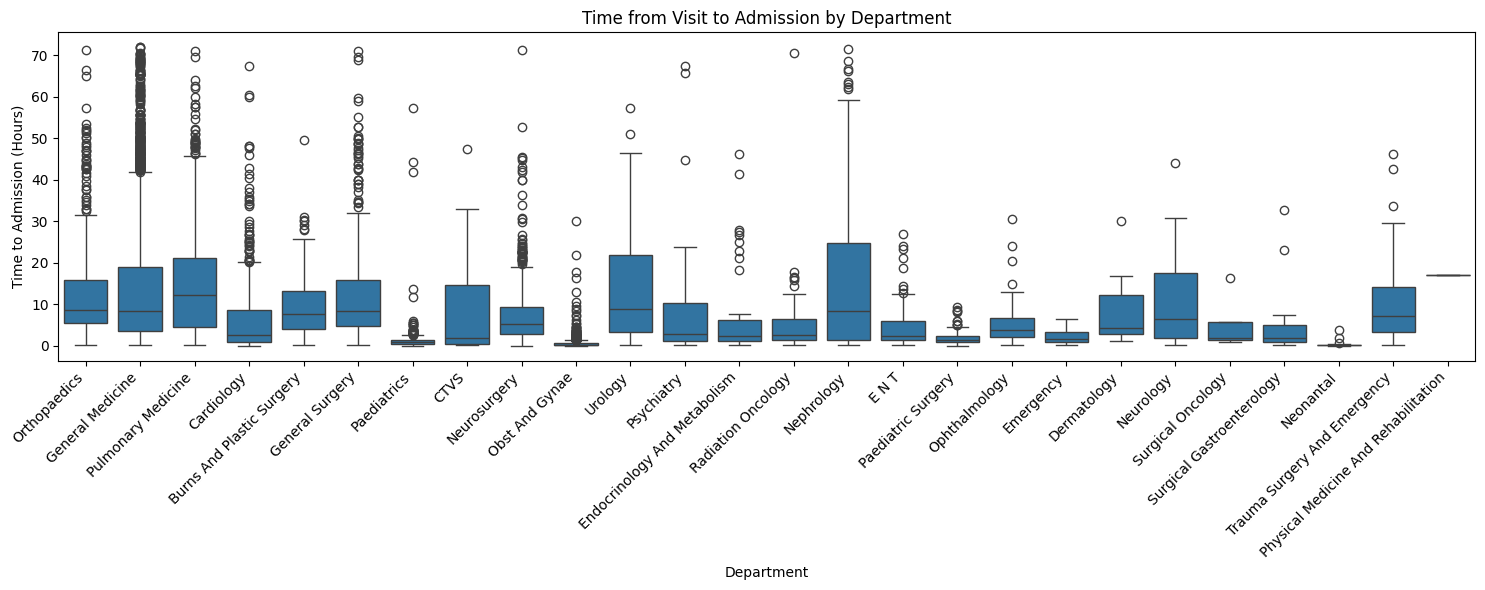

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert visit and admission times to datetime
df['Emergency_Visit_date'] = pd.to_datetime(df['Emergency_Visit_date'])
df['Admission_Date'] = pd.to_datetime(df['Admission_Date'])

# Calculate time difference in hours
df['Time_to_Admission'] = (df['Admission_Date'] - df['Emergency_Visit_date']).dt.total_seconds() / 3600

# Basic statistics of time to admission
print("\
Time to Admission Statistics (in hours):")
print(df['Time_to_Admission'].describe().round(2))

# Create a boxplot by department
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Department_Name', y='Time_to_Admission')
plt.xticks(rotation=45, ha='right')
plt.title('Time from Visit to Admission by Department')
plt.xlabel('Department')
plt.ylabel('Time to Admission (Hours)')
plt.tight_layout()
plt.show()

In [73]:
# Calculate average time to admission by department
dept_avg_time = df.groupby('Department_Name')['Time_to_Admission'].agg(['mean', 'median', 'count']).round(2)
dept_avg_time = dept_avg_time.sort_values('mean', ascending=False)

print("\
Average Time to Admission by Department (in hours): 2024")
print(dept_avg_time)

Average Time to Admission by Department (in hours): 2024
                                       mean  median  count
Department_Name                                           
Physical Medicine And Rehabilitation  17.12   17.12      1
Nephrology                            15.82    8.48    333
Pulmonary Medicine                    14.83   12.18    754
Urology                               14.46    8.92     68
General Medicine                      13.43    8.47   4225
Orthopaedics                          12.30    8.62    851
General Surgery                       11.26    8.28   1119
Psychiatry                            10.04    2.92     37
Neurology                             10.04    6.55     63
Trauma Surgery And Emergency           9.73    7.10    113
Burns And Plastic Surgery              9.51    7.70    202
Dermatology                            8.48    4.22     12
Endocrinology And Metabolism           8.29    2.43     39
CTVS                                   8.03    1.83     34

In [39]:
print("Available columns in the dataset:")
print(df.columns.tolist())

Available columns in the dataset:
['CR_No', 'Patient_Name', 'Emergency_Visit_date', 'Admission_Date', 'Ward_Type', 'Department_Name', 'Ward_Name', 'Treating_Doctor', 'Discharge_Date', 'LOS', 'Discharge_Status', 'Unnamed: 11', 'Time_to_Admission']


Time to Admission Statistics (in hours):
count    10921.00
mean        10.48
std         12.16
min          0.00
25%          2.07
50%          6.02
75%         15.03
max         71.98
Name: Time_to_Admission, dtype: float64


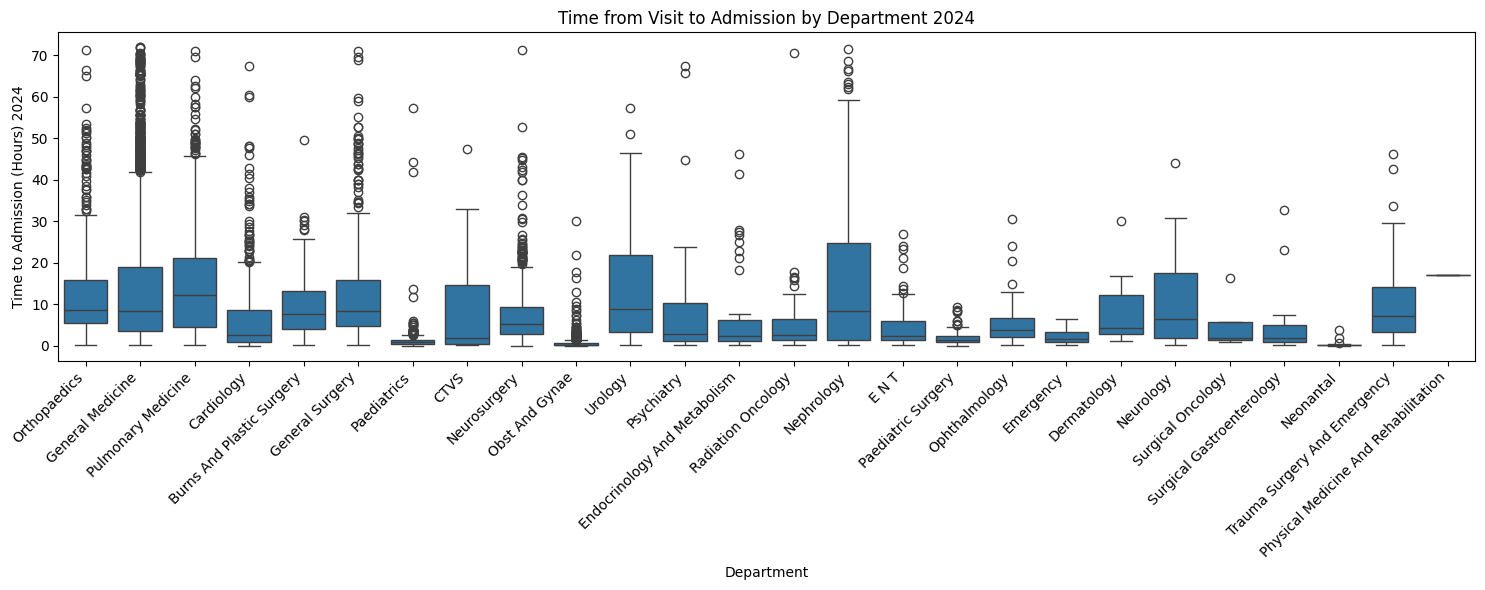

Average Time to Admission by Department (in hours):
                                       mean  median  count
Department_Name                                           
Physical Medicine And Rehabilitation  17.12   17.12      1
Nephrology                            15.82    8.48    333
Pulmonary Medicine                    14.83   12.18    754
Urology                               14.46    8.92     68
General Medicine                      13.43    8.47   4225
Orthopaedics                          12.30    8.62    851
General Surgery                       11.26    8.28   1119
Psychiatry                            10.04    2.92     37
Neurology                             10.04    6.55     63
Trauma Surgery And Emergency           9.73    7.10    113
Burns And Plastic Surgery              9.51    7.70    202
Dermatology                            8.48    4.22     12
Endocrinology And Metabolism           8.29    2.43     39
CTVS                                   8.03    1.83     34
Neur

In [72]:
# Correct column reference and calculate time to admission
df['Emergency_Visit_date'] = pd.to_datetime(df['Emergency_Visit_date'], errors='coerce')
df['Admission_Date'] = pd.to_datetime(df['Admission_Date'], errors='coerce')

# Calculate time difference in hours
df['Time_to_Admission'] = (df['Admission_Date'] - df['Emergency_Visit_date']).dt.total_seconds() / 3600

# Basic statistics of time to admission
print("\
Time to Admission Statistics (in hours):")
print(df['Time_to_Admission'].describe().round(2))

# Create a boxplot by department
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Department_Name', y='Time_to_Admission')
plt.xticks(rotation=45, ha='right')
plt.title('Time from Visit to Admission by Department 2024')
plt.xlabel('Department')
plt.ylabel('Time to Admission (Hours) 2024')
plt.tight_layout()
plt.show()

# Calculate average time to admission by department
dept_avg_time = df.groupby('Department_Name')['Time_to_Admission'].agg(['mean', 'median', 'count']).round(2)
dept_avg_time = dept_avg_time.sort_values('mean', ascending=False)

print("\
Average Time to Admission by Department (in hours):")
print(dept_avg_time)

In [41]:
# Filter the dataset to include only emergency visits
df['Emergency_Visit_date'] = pd.to_datetime(df['Emergency_Visit_date'], errors='coerce')
emergency_visits = df.dropna(subset=['Emergency_Visit_date'])

# Group by date and count the number of emergency visits
daily_emergency_visits = emergency_visits.groupby(emergency_visits['Emergency_Visit_date'].dt.date).size()

# Display the first few rows of the grouped data
print("Daily Emergency Visits (First 5 Rows):")
print(daily_emergency_visits.head())

Daily Emergency Visits (First 5 Rows):
Emergency_Visit_date
2023-12-31     2
2024-01-01    32
2024-01-02    31
2024-01-03    27
2024-01-04    23
dtype: int64


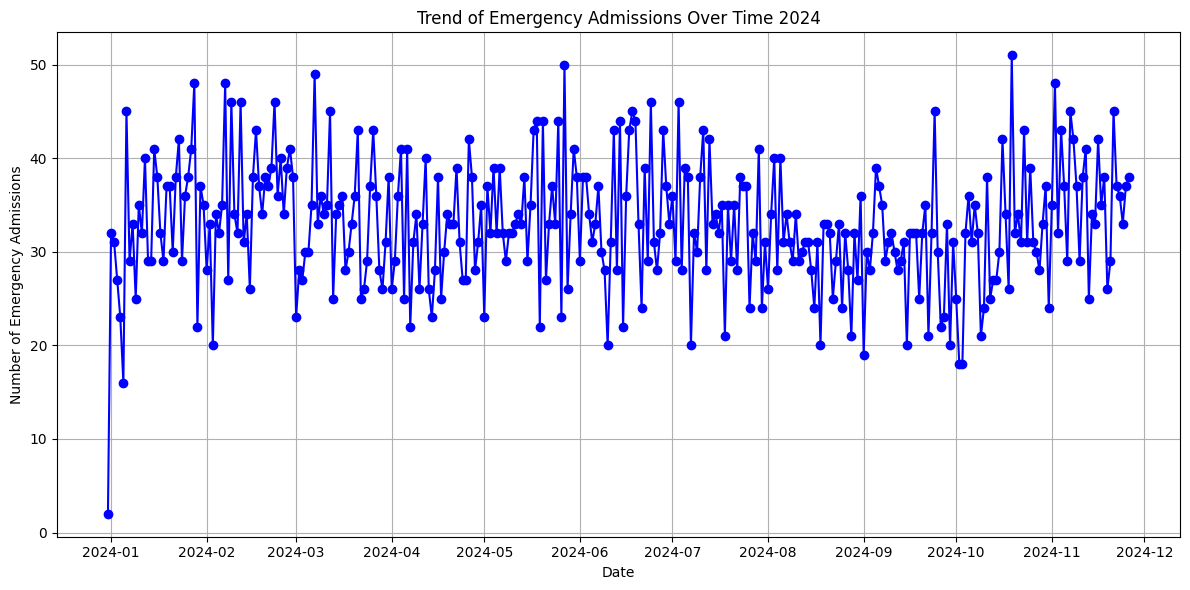

In [42]:
# Plot the trend of emergency visits over time
plt.figure(figsize=(12, 6))
daily_emergency_visits.plot(kind='line', marker='o', color='blue')
plt.title('Trend of Emergency Admissions Over Time 2024')
plt.xlabel('Date')
plt.ylabel('Number of Emergency Admissions')
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
monthly_stats = emergency_visits.groupby(emergency_visits['Emergency_Visit_date'].dt.to_period('M')).agg({
    'CR_No': 'count'
}).rename(columns={'CR_No': 'Visit_Count'})

print("\
Monthly Emergency Visit Statistics:")
print(monthly_stats)

# Calculate average visits per day
avg_visits = daily_emergency_visits.mean()
max_visits = daily_emergency_visits.max()
min_visits = daily_emergency_visits.min()

print("\
Summary Statistics:")
print(f"Average daily emergency Admissions: {avg_visits:.2f}")
print(f"Maximum daily emergency Admissions: {max_visits}")
print(f"Minimum daily emergency Admissions: {min_visits}")

Monthly Emergency Visit Statistics:
                      Visit_Count
Emergency_Visit_date             
2023-12                         2
2024-01                      1036
2024-02                      1046
2024-03                      1024
2024-04                       952
2024-05                      1068
2024-06                      1029
2024-07                      1024
2024-08                       936
2024-09                       895
2024-10                       965
2024-11                       944
Summary Statistics:
Average daily emergency Admissions: 32.89
Maximum daily emergency Admissions: 51
Minimum daily emergency Admissions: 2


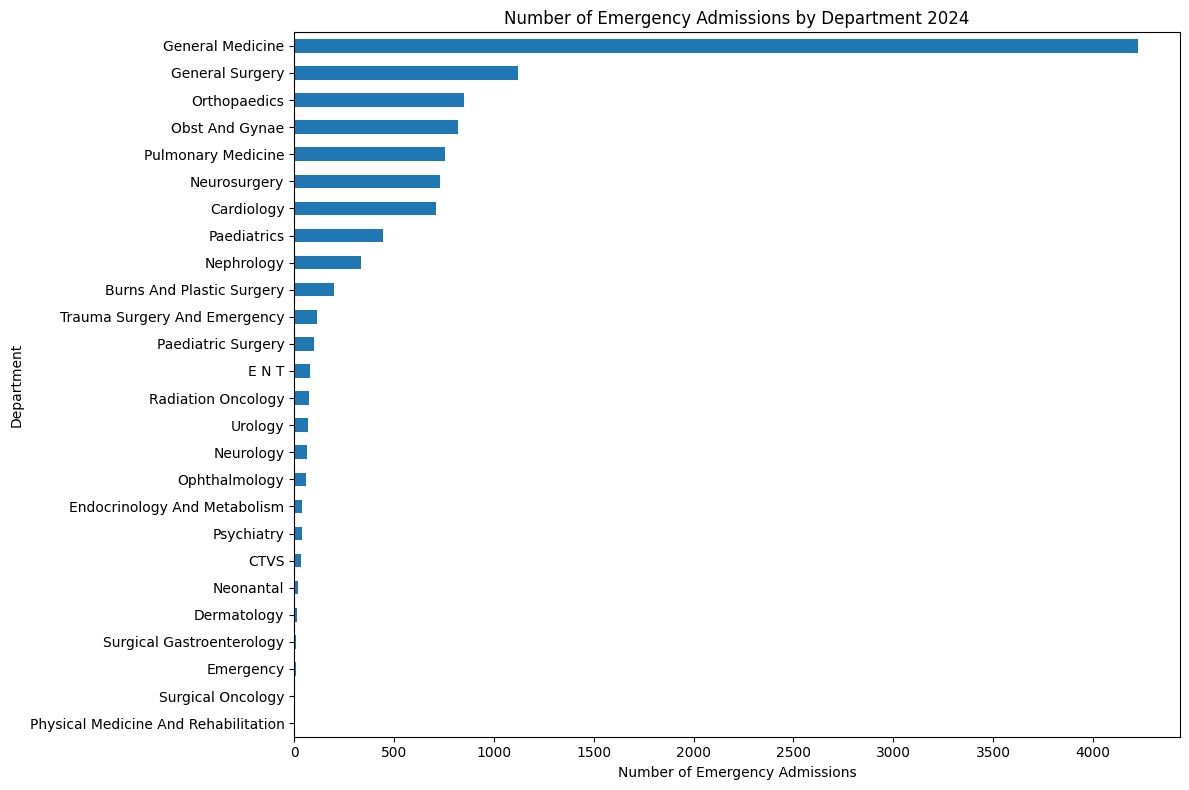

Emergency Admissions by Department (Count and Percentage):
Physical Medicine And Rehabilitation: 1 visits (0.01%)
Surgical Oncology: 4 visits (0.04%)
Emergency: 7 visits (0.06%)
Surgical Gastroenterology: 11 visits (0.1%)
Dermatology: 12 visits (0.11%)
Neonantal: 21 visits (0.19%)
CTVS: 34 visits (0.31%)
Psychiatry: 37 visits (0.34%)
Endocrinology And Metabolism: 39 visits (0.36%)
Ophthalmology: 59 visits (0.54%)
Neurology: 63 visits (0.58%)
Urology: 68 visits (0.62%)
Radiation Oncology: 76 visits (0.7%)
E N T: 81 visits (0.74%)
Paediatric Surgery: 100 visits (0.92%)
Trauma Surgery And Emergency: 113 visits (1.03%)
Burns And Plastic Surgery: 202 visits (1.85%)
Nephrology: 333 visits (3.05%)
Paediatrics: 446 visits (4.08%)
Cardiology: 712 visits (6.52%)
Neurosurgery: 730 visits (6.68%)
Pulmonary Medicine: 754 visits (6.9%)
Obst And Gynae: 823 visits (7.54%)
Orthopaedics: 851 visits (7.79%)
General Surgery: 1119 visits (10.25%)
General Medicine: 4225 visits (38.69%)


In [48]:
# Group emergency visits by department
dept_emergency = df[df['Emergency_Visit_date'].notna()].groupby('Department_Name').size().sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
dept_emergency.plot(kind='barh')
plt.title('Number of Emergency Admissions by Department 2024')
plt.xlabel('Number of Emergency Admissions')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

# Calculate percentage distribution
total_emergencies = dept_emergency.sum()
dept_emergency_pct = (dept_emergency / total_emergencies * 100).round(2)

print("\
Emergency Admissions by Department (Count and Percentage):")
for dept, count in dept_emergency.items():
    pct = dept_emergency_pct[dept]
    print(f"{dept}: {count} visits ({pct}%)")

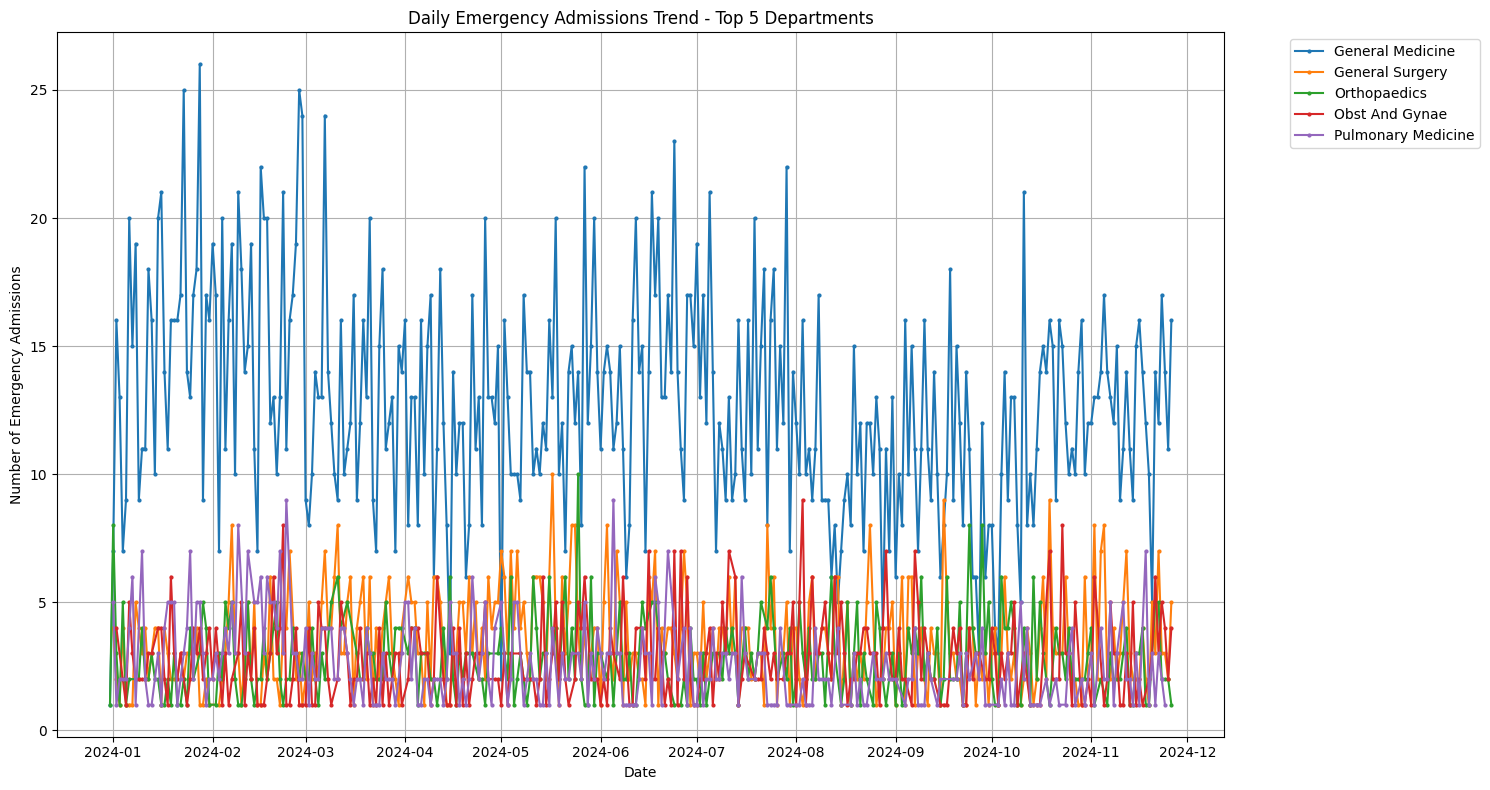

Average Daily Emergency Admissions by Top Departments:
General Medicine: 12.7 Admissions per day
General Surgery: 3.5 Admissions per day
Orthopaedics: 2.8 Admissions per day
Obst And Gynae: 2.8 Admissions per day
Pulmonary Medicine: 2.6 Admissions per day


In [47]:
# Select top 5 departments by volume
top_depts = df[df['Emergency_Visit_date'].notna()].groupby('Department_Name').size().nlargest(5).index

# Create time series for top departments
plt.figure(figsize=(15, 8))

for dept in top_depts:
    dept_data = df[df['Department_Name'] == dept]
    daily_visits = dept_data.groupby(pd.to_datetime(dept_data['Emergency_Visit_date']).dt.date).size()
    plt.plot(daily_visits.index, daily_visits.values, label=dept, marker='o', markersize=2)

plt.title('Daily Emergency Admissions Trend - Top 5 Departments')
plt.xlabel('Date')
plt.ylabel('Number of Emergency Admissions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate average daily Admissions for top departments
print("\
Average Daily Emergency Admissions by Top Departments:")
for dept in top_depts:
    dept_data = df[df['Department_Name'] == dept]
    daily_avg = dept_data.groupby(pd.to_datetime(dept_data['Emergency_Visit_date']).dt.date).size().mean()
    print(f"{dept}: {daily_avg:.1f} Admissions per day")

Delay Statistics (in hours):
count    10921.000000
mean        10.481790
std         12.155222
min          0.000000
25%          2.066667
50%          6.016667
75%         15.033333
max         71.983333
Name: admission_delay, dtype: float64


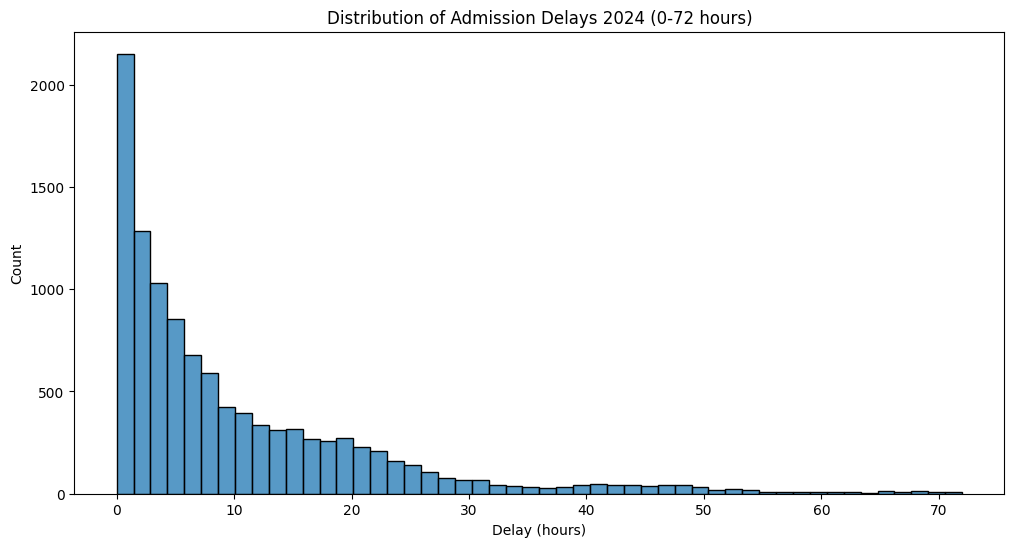

Average Admission Delays by Department 2024(in hours):
                                       mean  median  count
Department_Name                                           
Physical Medicine And Rehabilitation  17.12   17.12      1
Nephrology                            15.82    8.48    333
Pulmonary Medicine                    14.83   12.18    754
Urology                               14.46    8.92     68
General Medicine                      13.43    8.47   4225
Orthopaedics                          12.30    8.62    851
General Surgery                       11.26    8.28   1119
Psychiatry                            10.04    2.92     37
Neurology                             10.04    6.55     63
Trauma Surgery And Emergency           9.73    7.10    113
Burns And Plastic Surgery              9.51    7.70    202
Dermatology                            8.48    4.22     12
Endocrinology And Metabolism           8.29    2.43     39
CTVS                                   8.03    1.83     34
N

In [51]:
# Convert dates to datetime and calculate delay
df['Emergency_Visit_date'] = pd.to_datetime(df['Emergency_Visit_date'])
df['Admission_Date'] = pd.to_datetime(df['Admission_Date'])

# Calculate delay in hours
df['admission_delay'] = (df['Admission_Date'] - df['Emergency_Visit_date']).dt.total_seconds() / 3600

# Basic statistics of delay
delay_stats = df['admission_delay'].describe()
print("\
Delay Statistics (in hours):")
print(delay_stats)

# Create distribution plot of delays
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['admission_delay'].between(0, 72)], x='admission_delay', bins=50)
plt.title('Distribution of Admission Delays 2024 (0-72 hours)')
plt.xlabel('Delay (hours)')
plt.ylabel('Count')
plt.show()

# Calculate average delay by department
dept_delays = df.groupby('Department_Name')['admission_delay'].agg(['mean', 'median', 'count']).round(2)
dept_delays = dept_delays.sort_values('mean', ascending=False)

print("\
Average Admission Delays by Department 2024(in hours):")
print(dept_delays)

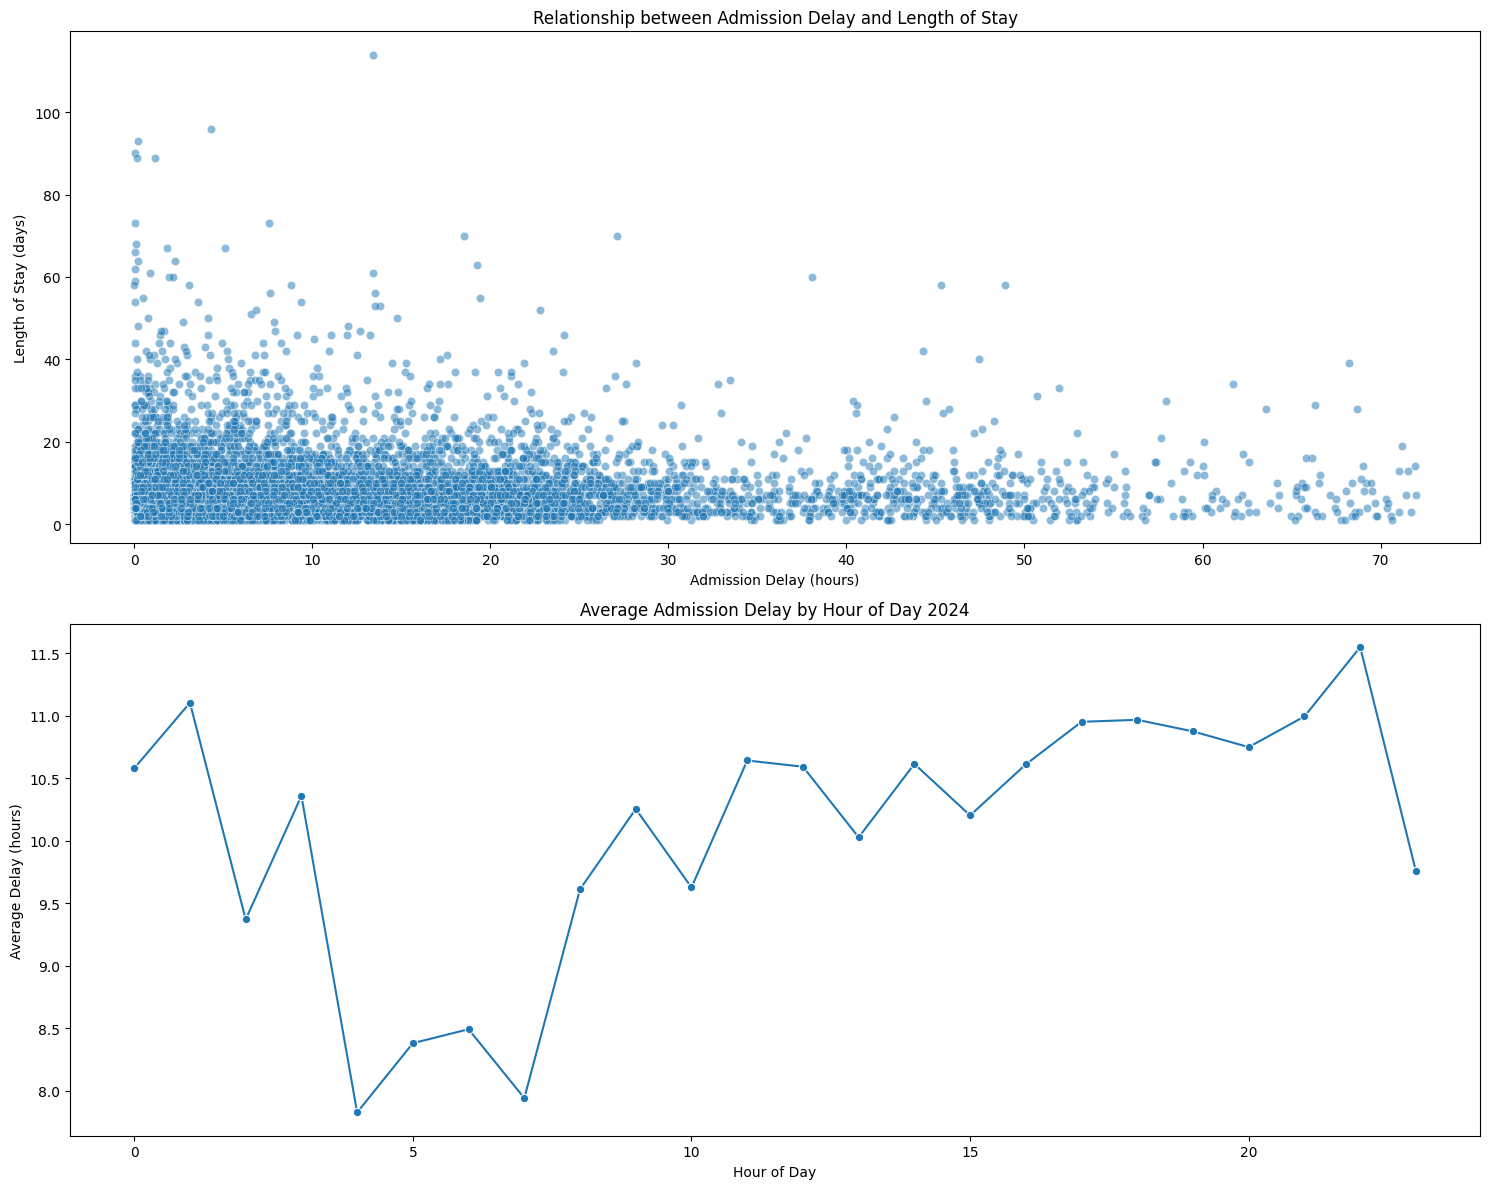

Correlation between Length of Stay and Admission Delay: 0.010
Average Delays by Day of Week 2024:
              mean  count
day_of_week              
Friday        9.79   1575
Monday       11.30   1654
Saturday     10.08   1652
Sunday       10.54   1394
Thursday     10.77   1511
Tuesday      10.16   1604
Wednesday    10.74   1531


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with multiple subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# 1. Correlation between LOS and admission delays
sns.scatterplot(data=df, x='admission_delay', y='LOS', alpha=0.5, ax=axes[0])
axes[0].set_title('Relationship between Admission Delay and Length of Stay')
axes[0].set_xlabel('Admission Delay (hours)')
axes[0].set_ylabel('Length of Stay (days)')

# 2. Time of day analysis
df['hour_of_visit'] = df['Emergency_Visit_date'].dt.hour
hourly_delays = df.groupby('hour_of_visit')['admission_delay'].mean()
sns.lineplot(data=hourly_delays, ax=axes[1], marker='o')
axes[1].set_title('Average Admission Delay by Hour of Day 2024')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Average Delay (hours)')

plt.tight_layout()
plt.show()

# Calculate correlation between LOS and admission delay
correlation = df['LOS'].corr(df['admission_delay'])
print(f"\
Correlation between Length of Stay and Admission Delay: {correlation:.3f}")

# Calculate average delays by day of week
df['day_of_week'] = df['Emergency_Visit_date'].dt.day_name()
day_delays = df.groupby('day_of_week')['admission_delay'].agg(['mean', 'count']).round(2)
print("\
Average Delays by Day of Week 2024:")
print(day_delays)

In [56]:
# Calculate average admission delays by treating doctor
doctor_delays = df.groupby('Treating_Doctor')['admission_delay'].agg(['mean', 'median', 'count']).round(2)
doctor_delays = doctor_delays.sort_values('mean', ascending=False)

# Show top 10 doctors with highest average delays
print("Top 10 Doctors by Average Admission Delay 2024:")
print(doctor_delays.head(50))

# Show summary statistics
print("\
Summary of Doctor Delays:")
print(f"Number of doctors: {len(doctor_delays)}")
print(f"Average delay across all doctors: {doctor_delays['mean'].mean():.2f} hours")
print(f"Maximum average delay: {doctor_delays['mean'].max():.2f} hours")
print(f"Minimum average delay: {doctor_delays['mean'].min():.2f} hours")

Top 10 Doctors by Average Admission Delay 2024:
                             mean  median  count
Treating_Doctor                                 
Dr KLEIN DANTIS             47.45   47.45      1
Dr Abhay Singh Gaur         29.92   29.92      2
Dr Maninder Kansal          23.70   23.70      1
Dr Deepak Chaudhary         18.48   11.52      5
Dr Amandeep Kaur            17.24   13.63     12
Dr Chandrakant Pilania      17.12   17.12      1
Dr Saurabh Nayak            16.68   10.90    296
Dr Gurvinder Pal Singh      16.58    3.58      6
Dr Nilesh Barwar            15.25   12.52     61
Dr Ramniwas                 14.83   12.18    754
Dr Pankaj K Sharma          14.81   10.81     52
Dr Kawaljit Singh Kaura     14.21    8.82     47
Dr Amrit pal singh Rana     14.04   12.84    230
Dr Jawahar Singh            13.46    7.70     10
Dr Suresh Kumar Goyal       13.44   14.58     19
Dr Preeti Singh Dhoat       13.41    8.42   4208
Dr Lokendra Singh           13.34    8.52     80
Dr Ankit Rai         

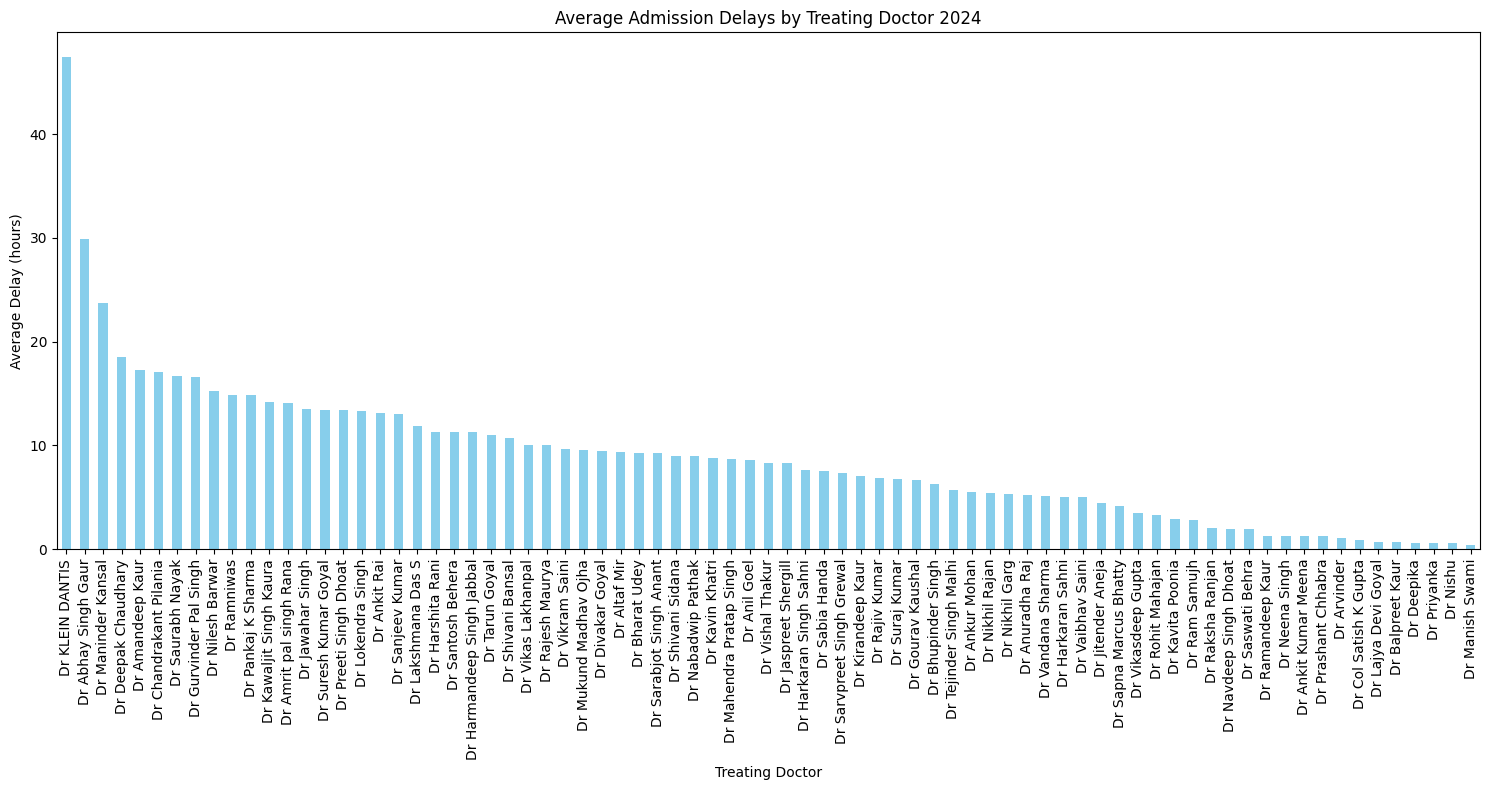

In [57]:
# Visualize admission delays by treating doctor
plt.figure(figsize=(15, 8))
doctor_delays['mean'].plot(kind='bar', color='skyblue')
plt.title('Average Admission Delays by Treating Doctor 2024')
plt.xlabel('Treating Doctor')
plt.ylabel('Average Delay (hours)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [58]:
# Calculate the distribution of discharge statuses
discharge_status_distribution = df['Discharge_Status'].value_counts(normalize=True).round(4) * 100

print("Discharge Status Distribution (%) 2024:")
print(discharge_status_distribution)

Discharge Status Distribution (%) 2024:
Discharge_Status
Normal Discharge    66.31
Death               17.95
On request           7.36
LAMA                 6.99
Referral             0.80
Absconded            0.58
Name: proportion, dtype: float64


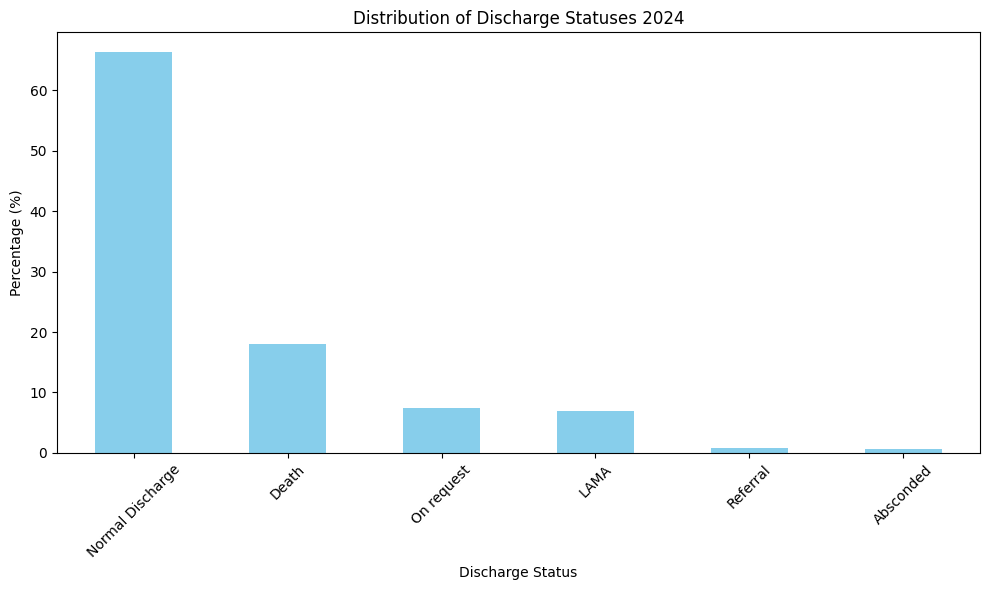

In [59]:
# Visualize the distribution of discharge statuses
plt.figure(figsize=(10, 6))
discharge_status_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Discharge Statuses 2024')
plt.xlabel('Discharge Status')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
# Group the data by Treating_Doctor and Discharge_Status to calculate counts and average delays
doctor_discharge = df.groupby(['Treating_Doctor', 'Discharge_Status'])['admission_delay'].agg(['mean', 'count']).round(2)

# Reset index for easier visualization
doctor_discharge = doctor_discharge.reset_index()

print("Grouped Data (Treating_Doctor vs Discharge_Status):")
print(doctor_discharge.head(30))

Grouped Data (Treating_Doctor vs Discharge_Status):
            Treating_Doctor  Discharge_Status   mean  count
0       Dr Abhay Singh Gaur  Normal Discharge  29.92      2
1              Dr Altaf Mir              LAMA   3.65      2
2              Dr Altaf Mir  Normal Discharge   9.43     77
3              Dr Altaf Mir        On request  10.02      5
4          Dr Amandeep Kaur             Death  11.94      3
5          Dr Amandeep Kaur              LAMA  14.92      1
6          Dr Amandeep Kaur  Normal Discharge  20.54      7
7          Dr Amandeep Kaur        On request  12.35      1
8   Dr Amrit pal singh Rana         Absconded   7.13      1
9   Dr Amrit pal singh Rana             Death  13.64     54
10  Dr Amrit pal singh Rana              LAMA  14.73     16
11  Dr Amrit pal singh Rana  Normal Discharge  14.13    124
12  Dr Amrit pal singh Rana        On request  15.65     24
13  Dr Amrit pal singh Rana          Referral  17.51      5
14             Dr Anil Goel             Death   

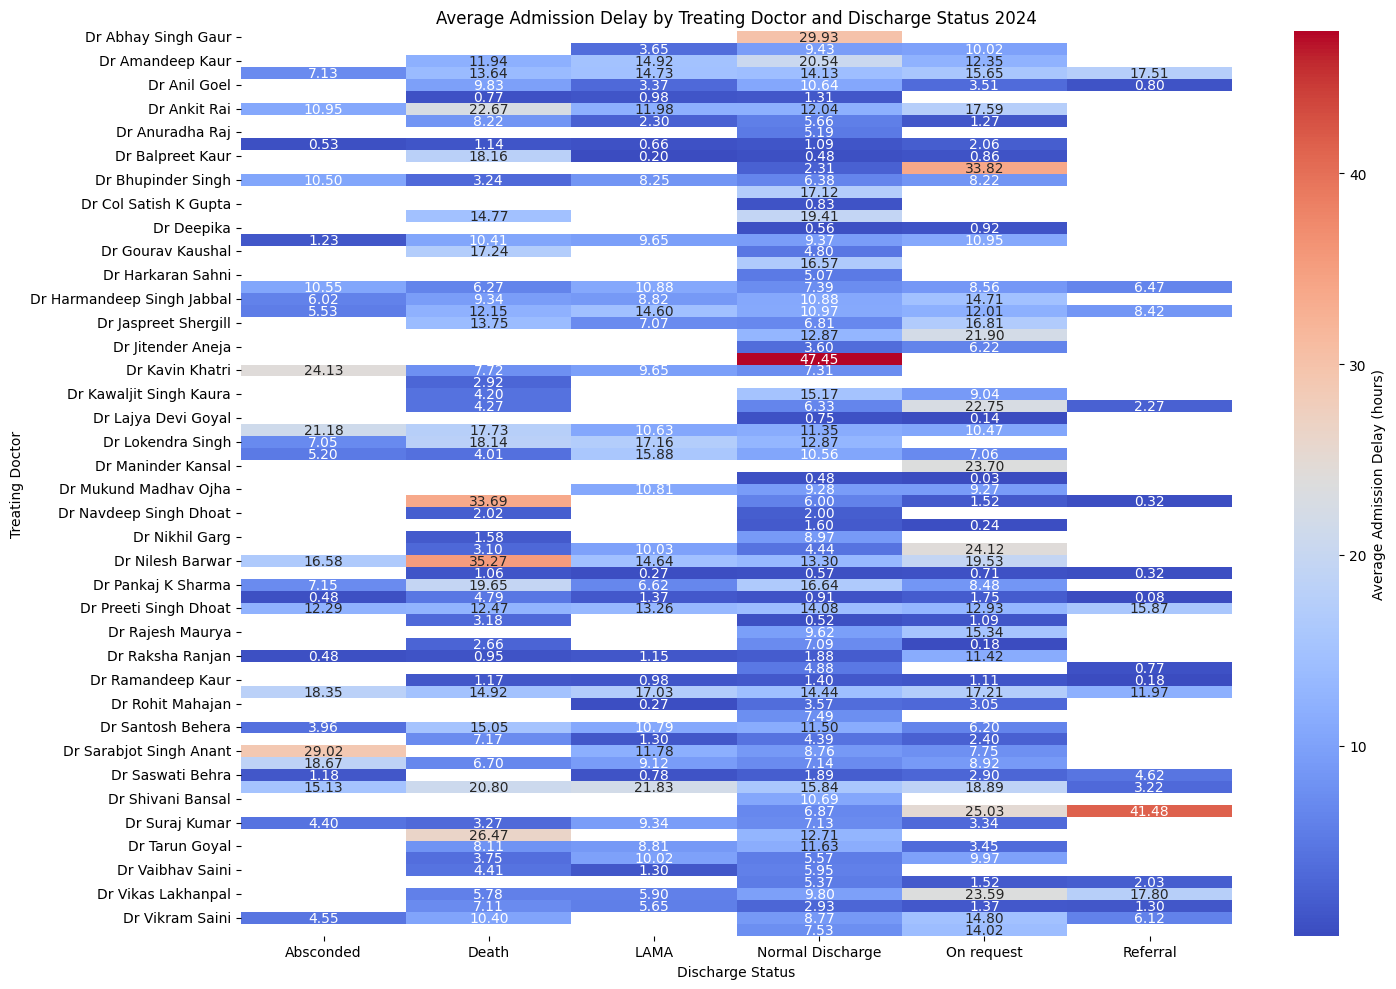

In [62]:
# Create a heatmap to visualize the relationship between Treating_Doctor and Discharge_Status
pivot_table = df.pivot_table(index='Treating_Doctor', columns='Discharge_Status', values='admission_delay', aggfunc='mean')

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Average Admission Delay (hours)'})
plt.title('Average Admission Delay by Treating Doctor and Discharge Status 2024')
plt.xlabel('Discharge Status')
plt.ylabel('Treating Doctor')
plt.tight_layout()
plt.show()

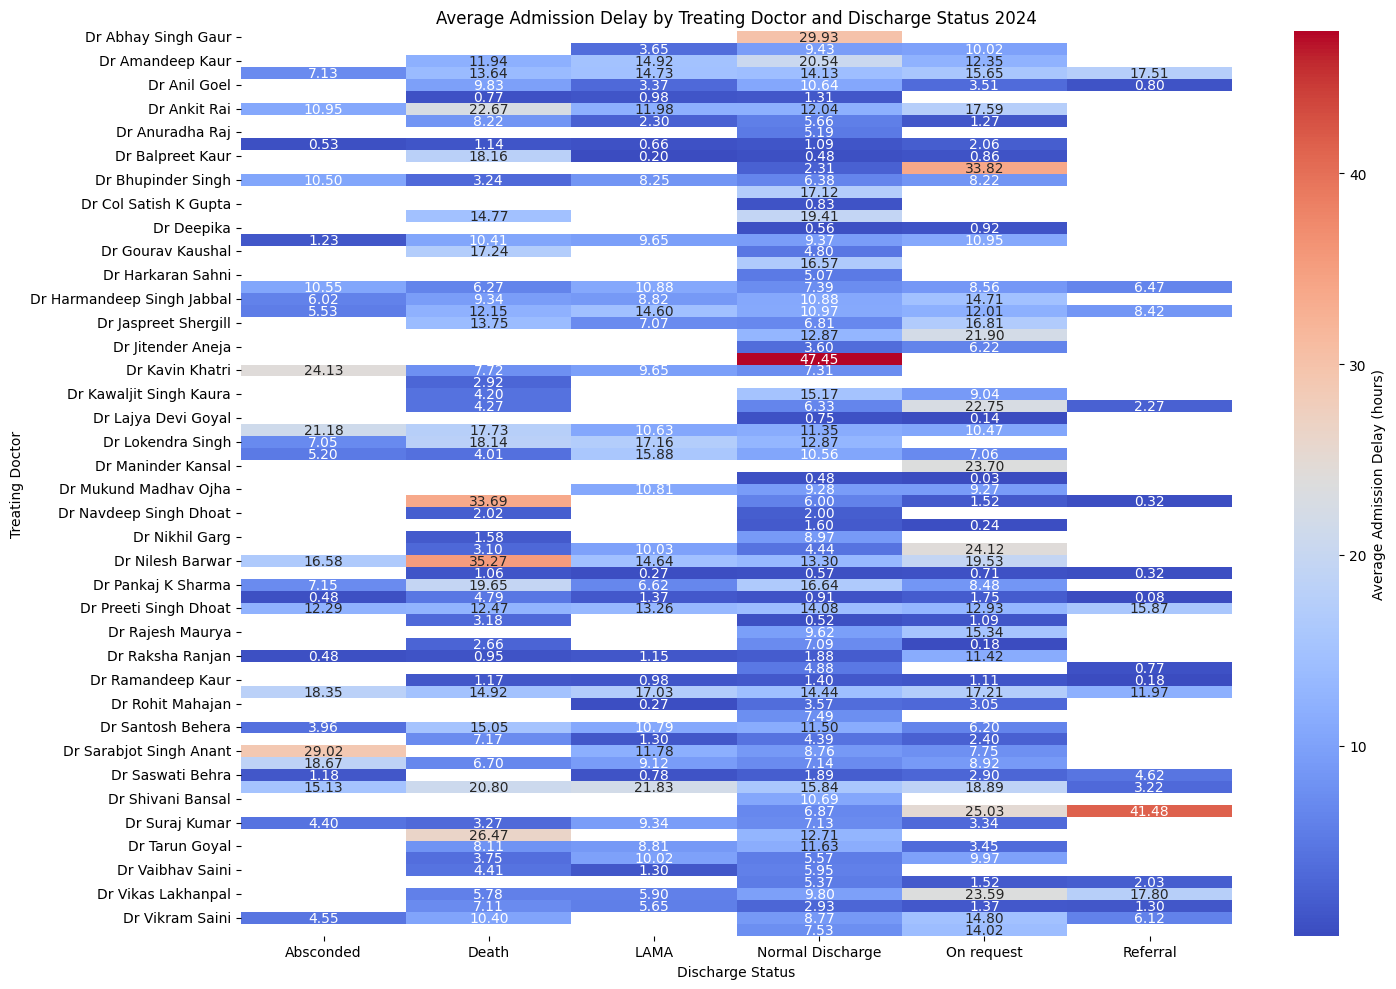

Top 10 Doctors by Total Cases:2024
Discharge_Status            Absconded  Death  LAMA  Normal Discharge  \
Treating_Doctor                                                        
Dr Preeti Singh Dhoat              22   1207   433              2101   
Dr Ramniwas                         7    165    30               439   
Dr Bhupinder Singh                  2     37    14               412   
Dr Sarvpreet Singh Grewal           1     82    46               355   
Dr Saurabh Nayak                    4     33     7               225   
Dr Nishu                            0      3     3               245   
Dr Harshita Rani                    1     52    13               180   
Dr Divakar Goyal                    3     40    10               159   
Dr Amrit pal singh Rana             1     54    16               124   
Dr Harmandeep Singh Jabbal          2     32     5               147   

Discharge_Status            On request  Referral  Total  
Treating_Doctor                           

<Figure size 1500x1000 with 0 Axes>

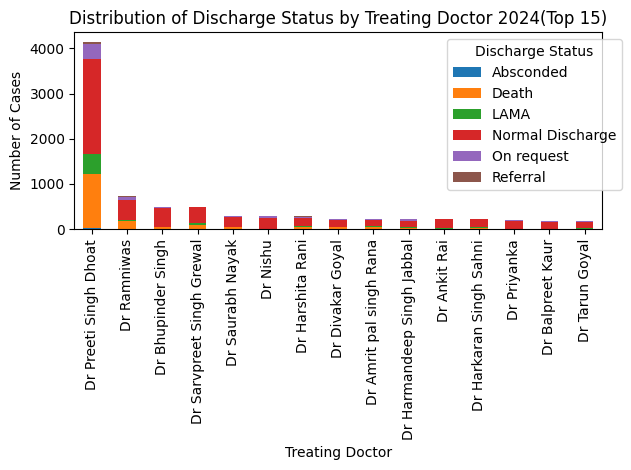

Summary Statistics:
Total number of doctors: 76
Average number of cases per discharge status:
Discharge_Status
Absconded            0.82
Death               25.26
LAMA                 9.84
Normal Discharge    93.30
On request          10.36
Referral             1.13
dtype: float64


In [65]:
# Create a cross-tabulation of Treating_Doctor vs Discharge_Status
discharge_counts = pd.crosstab(df['Treating_Doctor'], df['Discharge_Status'])

# Sort by total number of cases
discharge_counts['Total'] = discharge_counts.sum(axis=1)
discharge_counts = discharge_counts.sort_values('Total', ascending=False)

# Display top 10 doctors by total cases
print("Top 10 Doctors by Total Cases:2024")
print(discharge_counts.head(10))

# Calculate percentages for each doctor
discharge_percentages = discharge_counts.div(discharge_counts['Total'], axis=0) * 100

# Create a stacked bar plot
plt.figure(figsize=(15, 10))
discharge_counts.drop('Total', axis=1).head(15).plot(kind='bar', stacked=True)
plt.title('Distribution of Discharge Status by Treating Doctor 2024(Top 15)')
plt.xlabel('Treating Doctor')
plt.ylabel('Number of Cases')
plt.legend(title='Discharge Status', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Print summary statistics
print("\
Summary Statistics:")
print(f"Total number of doctors: {len(discharge_counts)}")
print("\
Average number of cases per discharge status:")
print(discharge_counts.drop('Total', axis=1).mean().round(2))

<Figure size 1500x1000 with 0 Axes>

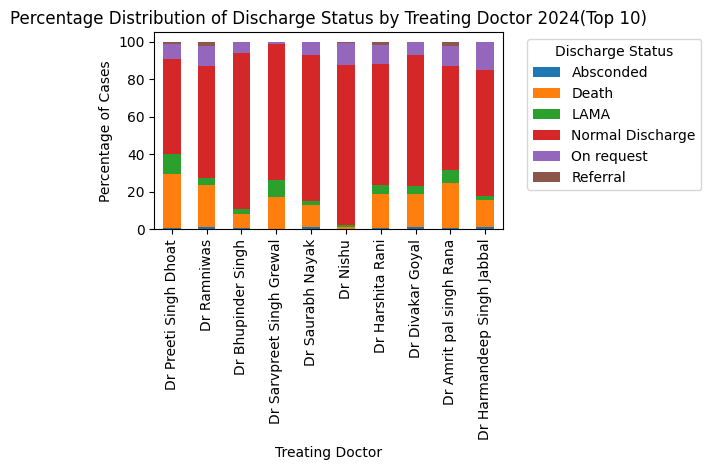

Percentage Distribution for Top 10 Doctors:2024
Discharge_Status            Absconded  Death   LAMA  Normal Discharge  \
Treating_Doctor                                                         
Dr Preeti Singh Dhoat            0.53  29.09  10.44             50.64   
Dr Ramniwas                      0.95  22.36   4.07             59.49   
Dr Bhupinder Singh               0.40   7.49   2.83             83.40   
Dr Sarvpreet Singh Grewal        0.20  16.73   9.39             72.45   
Dr Saurabh Nayak                 1.38  11.38   2.41             77.59   
Dr Nishu                         0.00   1.05   1.05             85.66   
Dr Harshita Rani                 0.36  18.57   4.64             64.29   
Dr Divakar Goyal                 1.32  17.54   4.39             69.74   
Dr Amrit pal singh Rana          0.45  24.11   7.14             55.36   
Dr Harmandeep Singh Jabbal       0.91  14.61   2.28             67.12   

Discharge_Status            On request  Referral  
Treating_Doctor         

In [67]:
# Calculate percentage distribution for top 10 doctors
top_10_percentages = discharge_percentages.head(10)

# Create a percentage stacked bar plot
plt.figure(figsize=(15, 10))
top_10_percentages.drop('Total', axis=1).plot(kind='bar', stacked=True)
plt.title('Percentage Distribution of Discharge Status by Treating Doctor 2024(Top 10)')
plt.xlabel('Treating Doctor')
plt.ylabel('Percentage of Cases')
plt.legend(title='Discharge Status', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Print percentage distribution for top 10 doctors
print("\
Percentage Distribution for Top 10 Doctors:2024")
print(top_10_percentages.drop('Total', axis=1).round(2))

In [68]:
# Filter out 'Normal Discharge' and calculate counts for other discharge statuses
discharge_counts_minus_normal = discharge_counts.drop(columns=['Normal Discharge', 'Total'])

# Display the top 10 doctors by counts of other discharge statuses
print("Top 10 Doctors by Discharge Status Counts (Excluding Normal Discharge):2024")
print(discharge_counts_minus_normal.head(10))

Top 10 Doctors by Discharge Status Counts (Excluding Normal Discharge):2024
Discharge_Status            Absconded  Death  LAMA  On request  Referral
Treating_Doctor                                                         
Dr Preeti Singh Dhoat              22   1207   433         346        40
Dr Ramniwas                         7    165    30          79        18
Dr Bhupinder Singh                  2     37    14          29         0
Dr Sarvpreet Singh Grewal           1     82    46           6         0
Dr Saurabh Nayak                    4     33     7          20         1
Dr Nishu                            0      3     3          33         2
Dr Harshita Rani                    1     52    13          29         5
Dr Divakar Goyal                    3     40    10          16         0
Dr Amrit pal singh Rana             1     54    16          24         5
Dr Harmandeep Singh Jabbal          2     32     5          33         0


In [69]:
# Calculate hourly patient arrivals
data['Hour'] = data['Arrival_Datetime'].dt.hour
hourly_arrivals = data['Hour'].value_counts().sort_index()

# Plot hourly patient flow
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_arrivals.index, y=hourly_arrivals.values)
plt.title('Hourly Patient Arrivals')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

# Calculate daily patient flow
data['Day'] = data['Arrival_Datetime'].dt.day_name()
daily_arrivals = data['Day'].value_counts()

# Order days correctly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_arrivals = daily_arrivals.reindex(day_order)

# Plot daily patient flow
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_arrivals.index, y=daily_arrivals.values)
plt.title('Daily Patient Arrivals')
plt.xlabel('Day of Week')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\
Hourly Patient Flow Statistics:")
print(hourly_arrivals.describe())

print("\
Daily Patient Flow Statistics:")
print(daily_arrivals.describe())

KeyError: 'Arrival_Datetime'